## ELECTRICITY PRODUCTION PREDICTION

In [1]:
# importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# importing dataset 

data = pd.read_csv(r"C:\Users\Mathivanan\Downloads\Electric_Production.csv", parse_dates=True, index_col="DATE")

In [3]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
data.rename(columns={"IPG2211A2N": "Electricity"}, inplace=True)        # renaming columns

In [6]:
# exploratory data analysis

In [7]:
data.head(10)

,Electricity
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [8]:
data.shape

(397, 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Electricity  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [10]:
data.isnull().any()

Electricity    False
dtype: bool

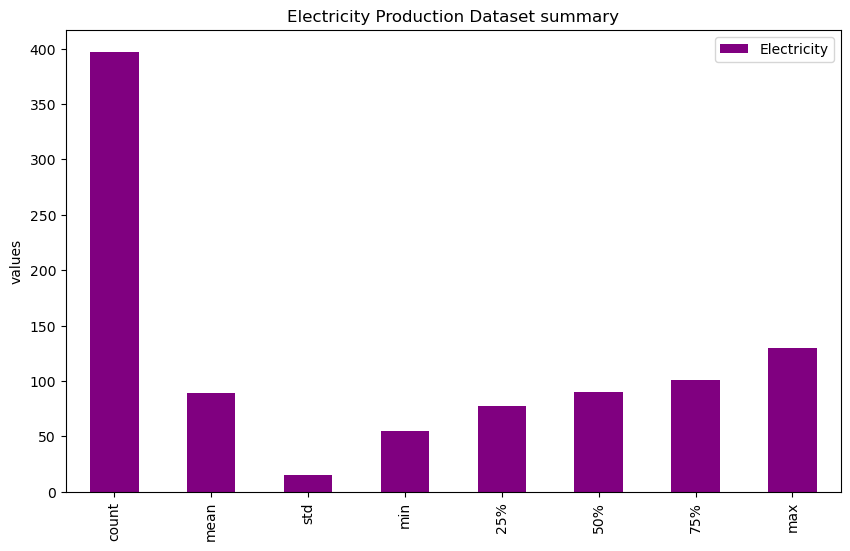

In [12]:
data_describe = data.describe()

data_describe.plot(kind="bar", figsize=(10, 6), color="purple")
plt.title("Electricity Production Dataset summary")
plt.ylabel("values")
plt.show()

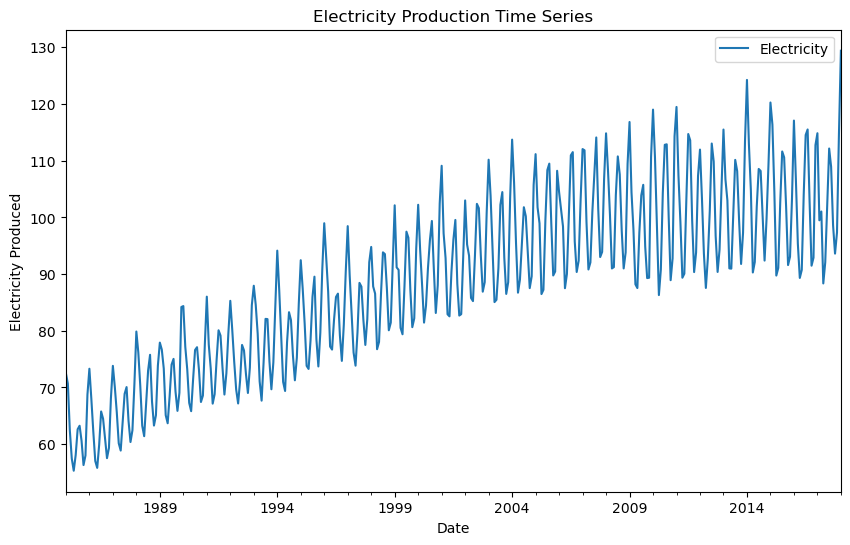

In [14]:
# plotting the dataset

data.plot(figsize=(10,6))
plt.title("Electricity Production Time Series")
plt.xlabel("Date")
plt.ylabel("Electricity Produced")
plt.show()

In [15]:
# checking whether data is stationary or not

In [16]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(dataset):
    result = adfuller(dataset, autolag='AIC')
    print(f'''ADF stastics: {result[0]}\n P-Value: {result[1]}\n No of Lags: {result[2]}\n No of obs for ADF and critical val calculation: {result[3]}\n Critical Values:''')
    for i, val in result[4].items():
        print(i, val)

In [18]:
def rollmeanstd_diag(data, rollmean, rollstd):
    original = plt.plot(data, color="red", label="original")
    mean = plt.plot(rollmean, color="blue", label="rolling mean")
    std = plt.plot(rollstd, color="purple", label="rolling std")
    plt.title("Rolling mean and standard deviation")
    plt.legend(loc="best")
    plt.show()

In [19]:
adfuller_test(data)

ADF stastics: -2.25699035004725
 P-Value: 0.18621469116586592
 No of Lags: 15
 No of obs for ADF and critical val calculation: 381
 Critical Values:
1% -3.4476305904172904
5% -2.869155980820355
10% -2.570827146203181


In [20]:
rollmean_org = data.rolling(12).mean()
rollstd_org = data.rolling(12).std()

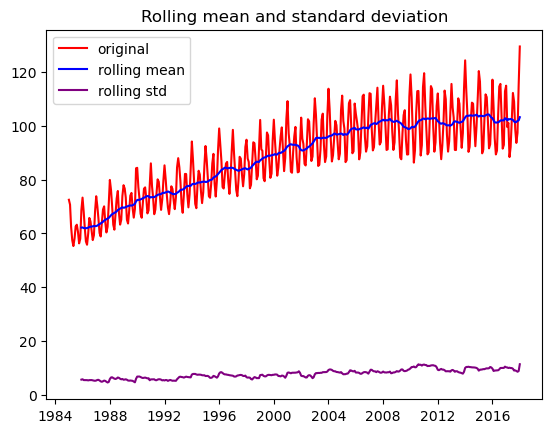

In [21]:
rollmeanstd_diag(data, rollmean_org, rollstd_org)

In [22]:
# data is not stationary, following steps are to make the data stationary

In [23]:
# logarithm

In [24]:
data_log = np.log(data)

In [26]:
rollmean_log = data_log.rolling(10).mean()
rollstd_log = data_log.rolling(10).std()

In [27]:
# differencing 

In [28]:
data_log_diff = data_log - data_log.shift(1)

In [30]:
rollmean_diff = data_log_diff.rolling(12).mean()
rollstd_diff = data_log_diff.rolling(12).std()

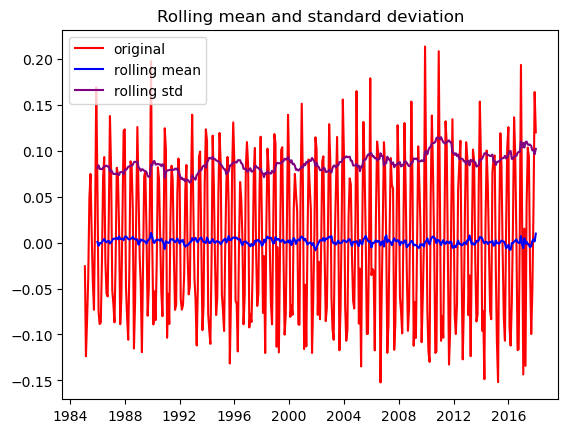

In [31]:
rollmeanstd_diag(data_log_diff, rollmean_diff, rollstd_diff)

In [32]:
data_log_diff.isnull().any()

Electricity    True
dtype: bool

In [33]:
data_log_diff.dropna(inplace=True)

In [35]:
# data is stationary now 

In [36]:
# spliting dataset into train and test

In [37]:
data_len = len(data_log_diff)
print(data_len)

396


In [40]:
train_data_ratio = int(0.9*data_len)
print(train_data_ratio)

356


In [41]:
train_data = data_log_diff[:train_data_ratio]
test_data = data_log_diff[train_data_ratio:]

In [42]:
print(len(train_data))
print(len(test_data))

356
40


In [43]:
# acf and pcf plot to choose the model

In [45]:
from statsmodels.tsa.stattools import acf, pacf 
acf_lag = acf(train_data, nlags=20)
pacf_lag = pacf(train_data, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

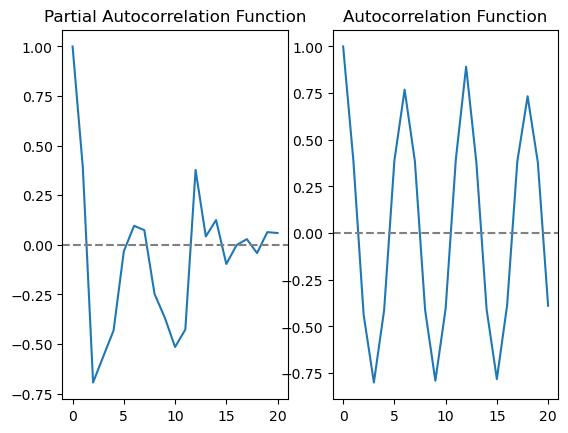

In [47]:
plt.subplot(1,2,1)
plt.plot(pacf_lag)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.subplot(1,2,2)
plt.plot(acf_lag)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

In [48]:
# auto arima model for choosing best value for p,d,q

In [49]:
from pmdarima import auto_arima

In [50]:
auto_arim = auto_arima(train_data, trace=True, suppress_warnings=True, d=1)
auto_arim.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1224.075, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-685.983, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-695.120, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-706.761, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-687.982, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1152.601, Time=0.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1142.037, Time=0.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1208.805, Time=0.83 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1232.233, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  356
Model:               SARIMAX(3, 1, 3)   Log Likelihood                 655.254
Date:                Sat, 13 Jan 2024   AIC                          -1296.509
Time:                        22:48:58   BIC                          -1269.404
Sample:                    02-01-1985   HQIC                         -1285.726
                         - 09-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8898      0.079     11.321      0.000       0.736       1.044
ar.L2         -0.8779      0.075    -11.771      0.000      -1.024      -0.732
ar.L3         -0.1002      0.072     -1.394      0.163      -0.241       0.041
ma.L1         -1.9457      0.097    -20.094      0.000      -2.135      -1.756
ma.L2          1.7650      0.142     12.450      0.000       1.487       2.043
ma.L3         -0.8100      0.084     -9.696      0.000      -0.974      -0.646
sigma2         0.0015      0.000      9.861      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.93   Prob(JB):                         0.48
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
# best (p,d,q) value is (3,1,3)

In [52]:
# model creation and training

In [55]:
from statsmodels.tsa.arima.model import ARIMA 
import warnings 
warnings.filterwarnings("ignore")

In [56]:
model = ARIMA(train_data, order=(3,1,3)) 
model_result = model.fit()
model_result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Electricity   No. Observations:                  356
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 655.254
Date:                Sat, 13 Jan 2024   AIC                          -1296.509
Time:                        22:49:16   BIC                          -1269.404
Sample:                    02-01-1985   HQIC                         -1285.726
                         - 09-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8898      0.079     11.321      0.000       0.736       1.044
ar.L2         -0.8779      0.075    -11.771      0.000      -1.024      -0.732
ar.L3         -0.1002      0.072     -1.394      0.163      -0.241       0.041
ma.L1         -1.9457      0.097    -20.094      0.000      -2.135      -1.756
ma.L2          1.7650      0.142     12.450      0.000       1.487       2.043
ma.L3         -0.8100      0.084     -9.696      0.000      -0.974      -0.646
sigma2         0.0015      0.000      9.861      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.93   Prob(JB):                         0.48
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.89   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# model testing 

In [58]:
from sklearn.metrics import mean_squared_error

In [60]:
predictions = model_result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)
arima_score = mean_squared_error(test_data, predictions)
print('ARIMA MSE: {}'.format(round(arima_score,4)))

ARIMA MSE: 0.0026


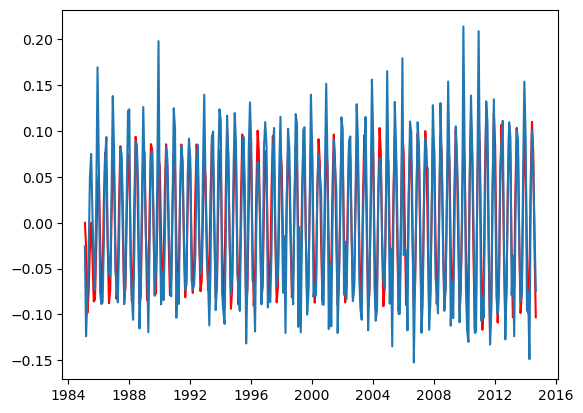

In [62]:
# plot for original train dataset vs model fitted values

plt.plot(model_result.fittedvalues, color="red")
plt.plot(train_data)

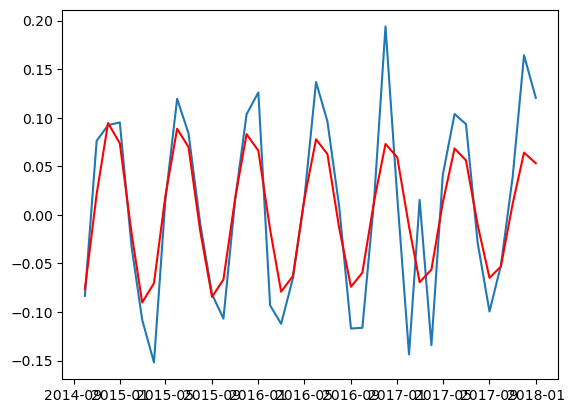

In [64]:
# plot for actual test data vs predicted test data

plt.plot(test_data)
plt.plot(predictions,color="red")

In [65]:
# the model is performing well 